In [2]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4
line_w=lw

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

a=  2.75
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.

In [2]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

In [3]:
print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)

-0.5821240440944074
0.7824551376738471
-1.2272811234164545
2.309177594927676


In [4]:
mom1_list=np.hstack(openCfile("data_a275/tr_moment1.txt"))
mom1_list

FileNotFoundError: [Errno 2] No such file or directory: 'data_a275/tr_moment1.txt'

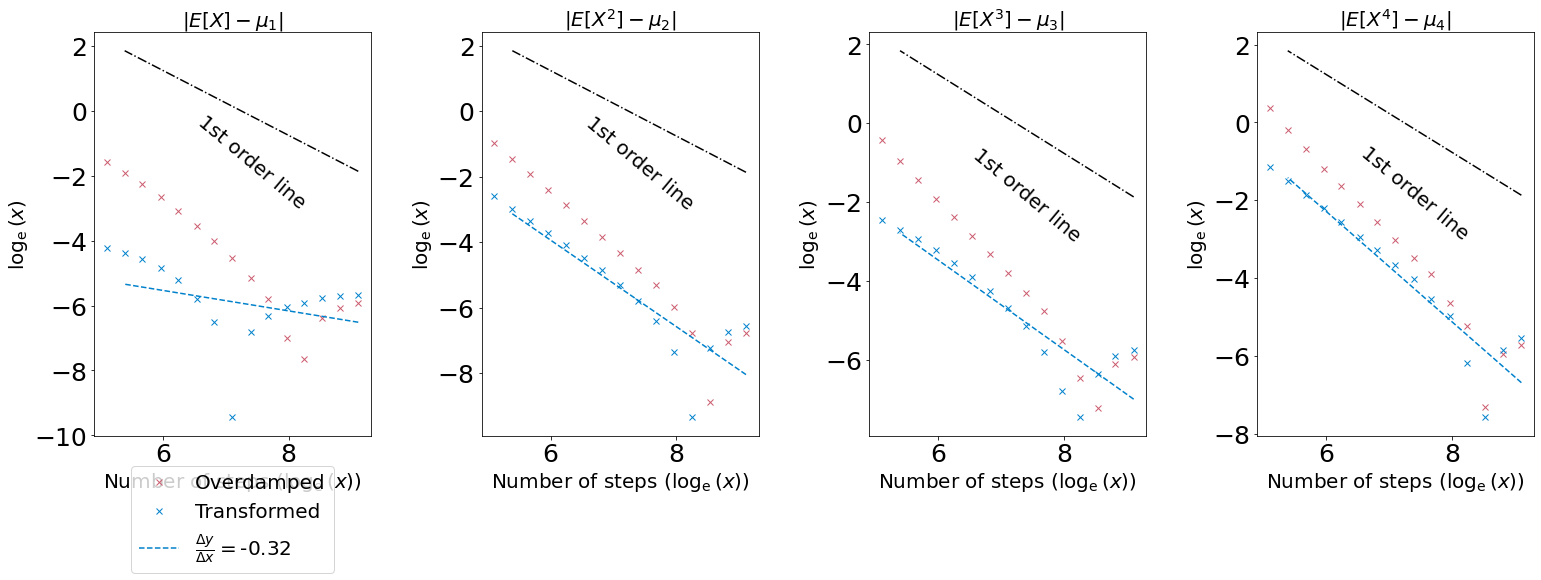

In [5]:
from settings_and_potential_eddie import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
nsteps=np.log(np.round(100/np.exp(xm),0))

lb=0
ub=-1 #len(dtlist)+1
x = np.log(np.round(100/dtlist[lb:ub],0))
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax1.set_title("First moment",fontsize=font_size,y=1.05)
# ax2.set_title("Second moment",fontsize=font_size,y=1.05)
# ax3.set_title("Third moment",fontsize=font_size,y=1.05)
# ax4.set_title("Fourth moment",fontsize=font_size,y=1.05)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_a25/noada_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a25/noada_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a25/noada_moment3.txt"))
mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(nsteps,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(nsteps,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(nsteps,np.log(mom3_list),"x",color=myred,label=lab)
ax4.plot(nsteps,np.log(mom4_list),"x",color=myred,label=lab)

## interpolation linear  
# #first moment
# m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
# ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
# #second moment
# m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
# ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
# #third moment
# m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
# ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
# #fourth moment
# m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
# ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_a25/tr_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a25/tr_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a25/tr_moment3.txt"))
mom4_list=np.hstack(openCfile("data_a25/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(nsteps,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(nsteps,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(nsteps,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(nsteps,np.log(mom4_list),"x",color=myblue,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax4.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

## Add the first order line 
ax1.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax1.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
ax2.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax2.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
ax3.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax3.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
ax4.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax4.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)

# ax1.set_ylim([-8,-1]) #change to -7.5 for a=2.5
# ax2.set_ylim([-8,-1])
# ax3.set_ylim([-8,-1])
# ax4.set_ylim([-8,-1])

# ax1.set_xlim([5,9])
# ax2.set_xlim([5,9])
# ax3.set_xlim([5,9])
# ax4.set_xlim([5,9])


#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.8)
ax2.set_title("$|E[X^2]-\\mu_2|$",fontsize=font_size*0.8)
ax3.set_title("$|E[X^3]-\\mu_3|$",fontsize=font_size*0.8)
ax4.set_title("$|E[X^4]-\\mu_4|$",fontsize=font_size*0.8)

# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax2.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax3.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)



# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax2.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax3.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax4.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# # Label of x axis 
# x=[5,6,7,8,9]
# labels = ['5', '6', '7', '8', '9']
# ax1.set_xticks(x, labels,fontsize=font_size*0.8)
# ax2.set_xticks(x, labels,fontsize=font_size*0.8)
# ax3.set_xticks(x, labels,fontsize=font_size*0.8)
# ax4.set_xticks(x, labels,fontsize=font_size*0.8)

# #label of y axis 
# # Label of x axis 
# y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
# labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
# ax1.set_yticks(y, labels,fontsize=font_size*0.8)
# ax2.set_yticks(y, labels,fontsize=font_size*0.8)
# ax3.set_yticks(y, labels,fontsize=font_size*0.8)
# ax4.set_yticks(y, labels,fontsize=font_size*0.8)

ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))


# fig.savefig("figures/moments_logplot_a25.eps")




0.3165683625039679

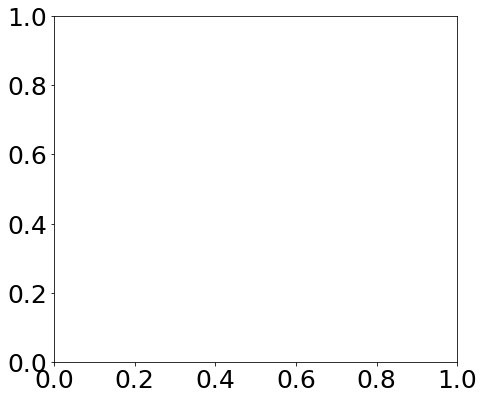

In [6]:

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (axs)= plt.subplots(1,1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax.set_title("Distribution of values of g",fontsize=font_size)
# ax2.set_title("Second moment",fontsize=font_size)
# ax3.set_title("Third moment",fontsize=font_size)
# ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"
g_all=[]
j=0
for i in range(int(len(dtlist)/2)):
    file_i="data_a25/vec_gi="+str(i*2)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))


    for i in g_vals_i:
        g_all.append(i)
 
np.mean(g_all)

np.min(g_all)
# np.max(g_all)

## Plot accuracy for the slides for Berlin


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


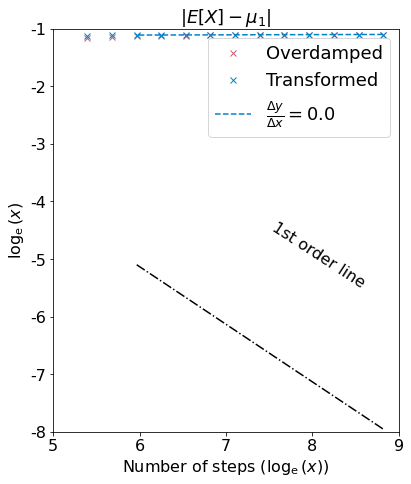

In [7]:
from settings_and_potential_eddie import *
font_size=20
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)[1:-1]
nsteps=np.log(np.round(100/np.exp(xm),0))

lb=1
ub=-3 #len(dtlist)+1
x = np.log(np.round(100/dtlist[lb:ub],0))
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(6,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)



## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_easy/noada_moment1.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)


#Plot moments
ax1.plot(nsteps,np.log(mom1_list)[1:-1],"x",color=myred,label=lab)



## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_easy/tr_moment1.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)


ax1.plot(nsteps,np.log(mom1_list)[1:-1],"x",color=myblue,label=lab)

## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)
# 1st order line 

## Add the first order line 
ax1.plot(x, -1*x + c+2.,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax1.text(7.5,-5.5,"1st order line",color="black",rotation=-33,fontsize=font_size*0.8)

ax1.set_ylim([-8,-1]) #change to -7.5 for a=2.5
ax1.set_xlim([5,9])

#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.9)


# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)


# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# Label of x axis 
x=[5,6,7,8,9]
labels = ['5', '6', '7', '8', '9']
ax1.set_xticks(x, labels,fontsize=font_size*0.8)

#label of y axis 
# Label of x axis 
y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
ax1.set_yticks(y, labels,fontsize=font_size*0.8)


ax1.legend(fontsize=font_size*0.9,ncol=1,loc="upper right" ,bbox_to_anchor=(1., 1.))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")
fig.savefig("figures/moments_logplot_easy_slides.eps",dpi=1000)
fig.savefig("figures/moments_logplot_easy_slides.pdf")



## Look at underdamped spring potential 
### Spring v2: extra computation of term in step O 

In [4]:

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
a=  2.75
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

range_int=[-10,10]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

In [5]:
true_mom_1

-0.5821240440943949

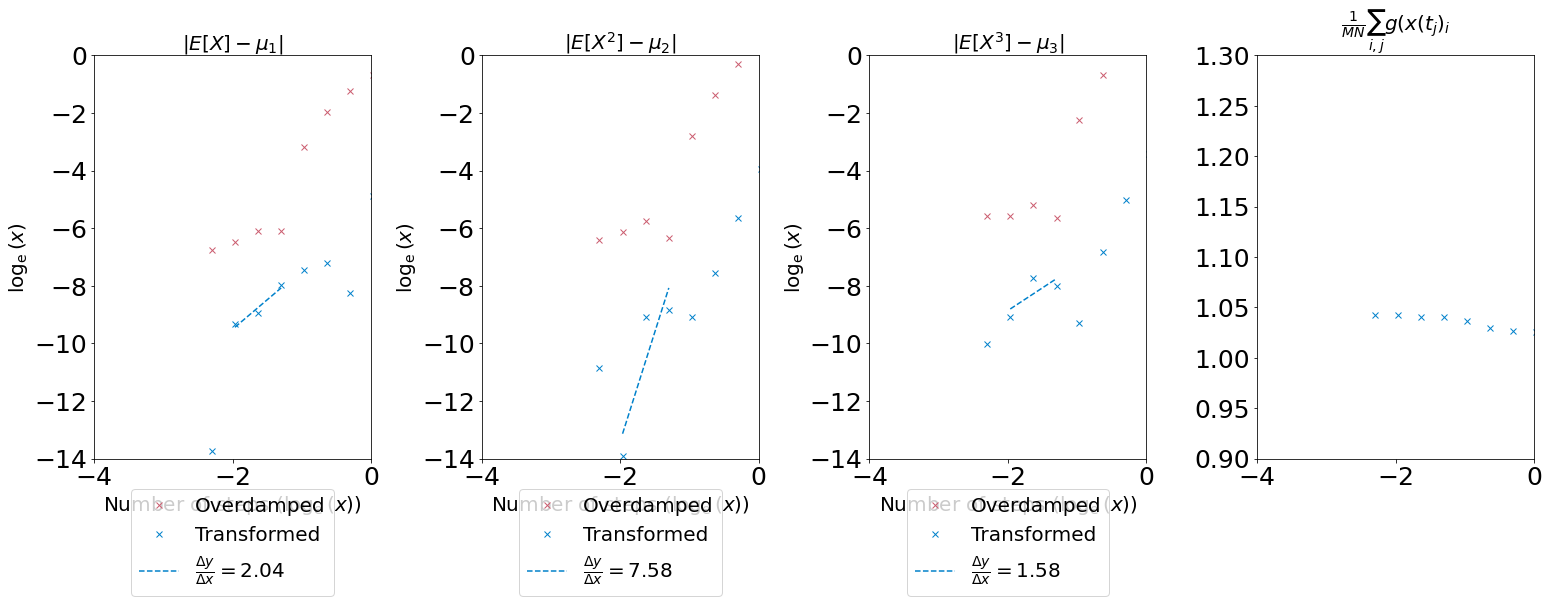

In [6]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/"


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=1
ub=-6 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax1.set_title("First moment",fontsize=font_size,y=1.05)
# ax2.set_title("Second moment",fontsize=font_size,y=1.05)
# ax3.set_title("Third moment",fontsize=font_size,y=1.05)
# ax4.set_title("Fourth moment",fontsize=font_size,y=1.05)

## no adaptive 
###############
lab="Overdamped"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list[0:3]=np.hstack(openCfile(path+"spring_v2/noada_moment1.txt"))[0:3]
mom2_list[0:3]=np.hstack(openCfile(path+"spring_v2/noada_moment2.txt"))[0:3]
mom3_list[0:3]=np.hstack(openCfile(path+"spring_v2/noada_moment3.txt"))[0:3]

mom1_list[3:-1]=np.hstack(openCfile(path+"spring_v2_2/noada_moment1.txt"))
mom2_list[3:-1]=np.hstack(openCfile(path+"spring_v2_2/noada_moment2.txt"))
mom3_list[3:-1]=np.hstack(openCfile(path+"spring_v2_2/noada_moment3.txt"))

# mom4_list=np.hstack(openCfile(path+"/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
# ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)



## Transformed 
###############
lab="Transformed"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list[0:3]=np.hstack(openCfile(path+"spring_v2/tr_moment1.txt"))[0:3]
mom2_list[0:3]=np.hstack(openCfile(path+"spring_v2/tr_moment2.txt"))[0:3]
mom3_list[0:3]=np.hstack(openCfile(path+"spring_v2/tr_moment3.txt"))[0:3]
gvals[0:3]=np.hstack(openCfile(path+"spring_v2/tr_moment4.txt"))[0:3]

mom1_list[3:-1]=np.hstack(openCfile(path+"spring_v2_2/tr_moment1.txt"))
mom2_list[3:-1]=np.hstack(openCfile(path+"spring_v2_2/tr_moment2.txt"))
mom3_list[3:-1]=np.hstack(openCfile(path+"spring_v2_2/tr_moment3.txt"))
gvals[3:-1]=np.hstack(openCfile(path+"spring_v2_2/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,(gvals),"x",color=myblue,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

# #fourth moment
# m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
# ax4.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# # ax4.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

## Add the first order line 
# ax1.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
# ax2.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
# ax3.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
# ax4.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax4.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)

ax1.set_ylim([-14,0]) #change to -7.5 for a=2.5
ax2.set_ylim([-14,0])
ax3.set_ylim([-14,0])
ax4.set_ylim([0.9,1.3]) #change to -7.5 for a=2.5

ax1.set_xlim([-4,0])
ax2.set_xlim([-4,0])
ax3.set_xlim([-4,0])
ax4.set_xlim([-4,0])


#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.8)
ax2.set_title("$|E[X^2]-\\mu_2|$",fontsize=font_size*0.8)
ax3.set_title("$|E[X^3]-\\mu_3|$",fontsize=font_size*0.8)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size*0.8)

# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax2.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax3.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)


# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax2.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax3.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
# ax4.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# # Label of x axis 
# x=[5,6,7,8,9]
# labels = ['5', '6', '7', '8', '9']
# ax1.set_xticks(x, labels,fontsize=font_size*0.8)
# ax2.set_xticks(x, labels,fontsize=font_size*0.8)
# ax3.set_xticks(x, labels,fontsize=font_size*0.8)
# ax4.set_xticks(x, labels,fontsize=font_size*0.8)

# #label of y axis 
# # Label of x axis 
# y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
# labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
# ax1.set_yticks(y, labels,fontsize=font_size*0.8)
# ax2.set_yticks(y, labels,fontsize=font_size*0.8)
# ax3.set_yticks(y, labels,fontsize=font_size*0.8)
# ax4.set_yticks(y, labels,fontsize=font_size*0.8)

ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))


# fig.savefig("figures/moments_logplot_a25.eps")




## Spring v1 vs spring v2



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


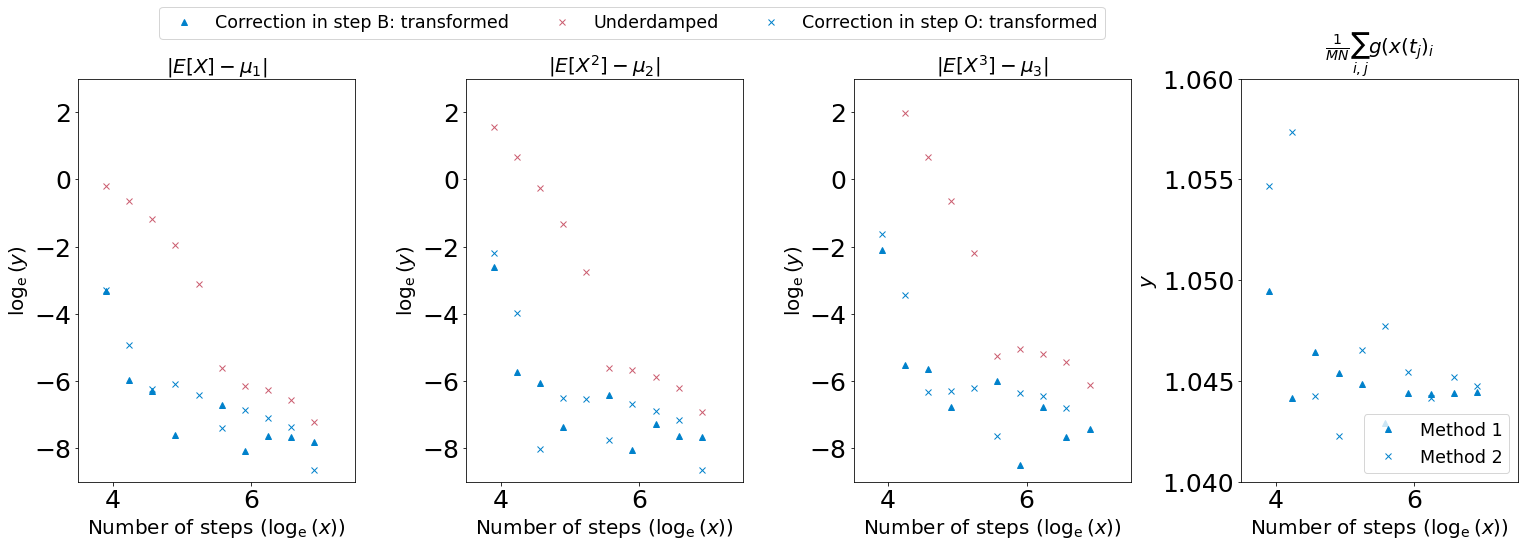

In [11]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v1_108/"

path2="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v2_108/"


# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= np.log(T/dtlist)
lb=1
ub=-6 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#############
## SPRING V1 
#############

## no adaptive 
###############
# lab="Method 1: underdamped"
# mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# # Upload moments
# mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))
# mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
# mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))

# mom1_list=np.abs(mom1_list-true_mom_1)
# mom2_list=np.abs(mom2_list-true_mom_2)
# mom3_list=np.abs(mom3_list-true_mom_3)

# #Plot moments
# ax1.plot(xm,np.log(mom1_list),"^",color=myred,label=lab)
# ax2.plot(xm,np.log(mom2_list),"^",color=myred,label=lab)
# ax3.plot(xm,np.log(mom3_list),"^",color=myred,label=lab)

## Transformed 
###############
lab="Correction in step B: transformed"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3.txt"))
gvals=np.hstack(openCfile(path1+"tr_moment4.txt"))


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"^",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"^",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"^",color=myblue,label=lab)
ax4.plot(xm,(gvals),"^",color=myblue,label="Method 1")

#############
## SPRING V2 
#############

## no adaptive 
###############
lab="Underdamped"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path2+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path2+"noada_moment3.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)

#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)

## Transformed 
###############
lab="Correction in step O: transformed"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path2+"tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path2+"tr_moment3.txt"))
gvals=np.hstack(openCfile(path2+"tr_moment4.txt"))


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,(gvals),"x",color=myblue,label="Method 2")

#############
## PLOT PARA 
#############

# ## Add the first order line 
# x=xm
# ax1.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

# ax1.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size*0.8)
# ax2.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size*0.8)
# ax3.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size*0.8)


ax1.set_ylim([-9,3]) #change to -7.5 for a=2.5
ax2.set_ylim([-9,3])
ax3.set_ylim([-9,3])
ax4.set_ylim([1.04,1.06]) #change to -7.5 for a=2.5

ax1.set_xlim([3.5,7.5])
ax2.set_xlim([3.5,7.5])
ax3.set_xlim([3.5,7.5])
ax4.set_xlim([3.5,7.5])


#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.8)
ax2.set_title("$|E[X^2]-\\mu_2|$",fontsize=font_size*0.8)
ax3.set_title("$|E[X^3]-\\mu_3|$",fontsize=font_size*0.8)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size*0.8)

# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(y)$",fontsize=font_size*0.8)
ax2.set_ylabel("$\\log_{\\rm{e}}(y)$",fontsize=font_size*0.8)
ax3.set_ylabel("$\\log_{\\rm{e}}(y)$",fontsize=font_size*0.8)
ax4.set_ylabel("$y$",fontsize=font_size*0.8)

# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)


# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax2.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax3.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax4.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# # Label of x axis 
# x=[5,6,7,8,9]
# labels = ['5', '6', '7', '8', '9']
# ax1.set_xticks(x, labels,fontsize=font_size*0.8)
# ax2.set_xticks(x, labels,fontsize=font_size*0.8)
# ax3.set_xticks(x, labels,fontsize=font_size*0.8)
# ax4.set_xticks(x, labels,fontsize=font_size*0.8)

# #label of y axis 
# # Label of x axis 
# y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
# labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
# ax1.set_yticks(y, labels,fontsize=font_size*0.8)
# ax2.set_yticks(y, labels,fontsize=font_size*0.8)
# ax3.set_yticks(y, labels,fontsize=font_size*0.8)
# ax4.set_yticks(y, labels,fontsize=font_size*0.8)

ax1.legend(fontsize=font_size*0.7,ncol=4,loc="upper center", bbox_to_anchor=(2., 1.2))
# ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax4.legend(fontsize=font_size*0.7,ncol=1,loc="lower right") #,bbox_to_anchor=(0.5, -0.05))

# /home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/spring_v1_v2_compare.eps")

plt.show()


### Plot for poster 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


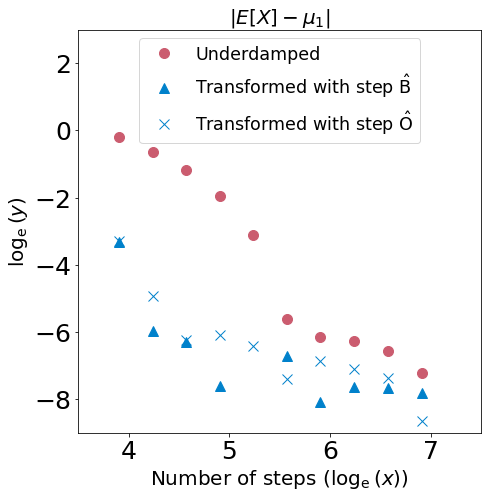

In [24]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v1_108/"

path2="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v2_108/"


# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= np.log(T/dtlist)
lb=1
ub=-6 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
mk_size=10

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
## no adaptive 
###############
lab="Underdamped"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path2+"noada_moment1.txt"))
mom1_list=np.abs(mom1_list-true_mom_1)
#Plot moments
ax1.plot(xm,np.log(mom1_list),"o",markersize=mk_size,color=myred,label=lab)

#############
## SPRING V1 
#############

## Transformed 
###############
lab="Transformed with step $\\hat{\\rm{B}}$"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1.txt"))
mom1_list=np.abs(mom1_list-true_mom_1)
ax1.plot(xm,np.log(mom1_list),"^",markersize=mk_size,color=myblue,label=lab)


#############
## SPRING V2 
#############

## Transformed 
###############
lab="Transformed with step $\\hat{\\rm{O}}$"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"tr_moment1.txt"))
mom1_list=np.abs(mom1_list-true_mom_1)
ax1.plot(xm,np.log(mom1_list),"x",markersize=mk_size,color=myblue,label=lab)

#############
## PLOT PARA 
#############
ax1.set_ylim([-9,3]) #change to -7.5 for a=2.5
ax1.set_xlim([3.5,7.5])
#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.8)
# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(y)$",fontsize=font_size*0.8)
# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax1.legend(fontsize=font_size*0.7,ncol=1,loc="upper center") #, bbox_to_anchor=(2., 1.2))
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/poster_plot_underddamped_spring.eps")


## Alternative run for 5 10^6

## Spring v1


NameError: name 'true_mom_1' is not defined

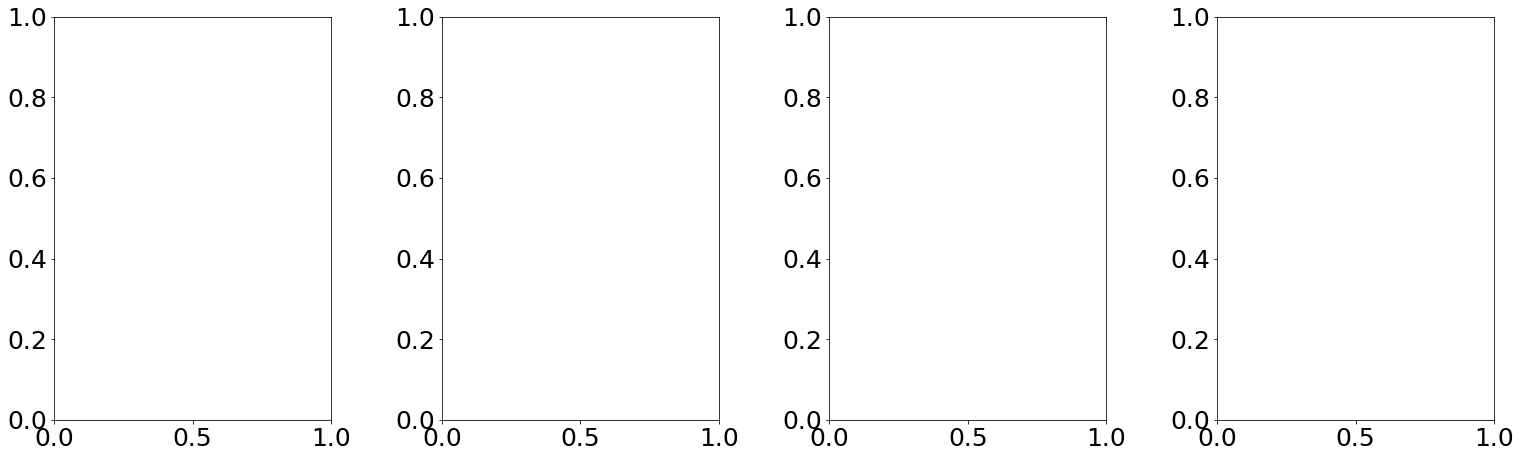

In [3]:


dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring/spring_v2"


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=1
ub=-6 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax1.set_title("First moment",fontsize=font_size,y=1.05)
# ax2.set_title("Second moment",fontsize=font_size,y=1.05)
# ax3.set_title("Third moment",fontsize=font_size,y=1.05)
# ax4.set_title("Fourth moment",fontsize=font_size,y=1.05)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile(path+"/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
# ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)



## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/tr_moment3.txt"))
gvals=np.hstack(openCfile(path+"/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,(gvals),"x",color=myblue,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

# #fourth moment
# m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
# ax4.plot(x, m*x + c,"--",color=myblue,label="$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2))) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# # ax4.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

## Add the first order line 
# ax1.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax1.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
# ax2.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
# ax3.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)
# ax4.plot(x, -1*x + c+1,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax4.text(6.5,-3.,"1st order line",color="black",rotation=-40,fontsize=font_size*0.8)

ax1.set_ylim([-14,0]) #change to -7.5 for a=2.5
ax2.set_ylim([-14,0])
ax3.set_ylim([-14,0])
ax4.set_ylim([0.9,1.3]) #change to -7.5 for a=2.5

ax1.set_xlim([-2,0])
ax2.set_xlim([-2,0])
ax3.set_xlim([-2,0])
ax4.set_xlim([-2,0])


#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.8)
ax2.set_title("$|E[X^2]-\\mu_2|$",fontsize=font_size*0.8)
ax3.set_title("$|E[X^3]-\\mu_3|$",fontsize=font_size*0.8)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size*0.8)

# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax2.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
ax3.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)
# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)


# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax2.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
ax3.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)
# ax4.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# # Label of x axis 
# x=[5,6,7,8,9]
# labels = ['5', '6', '7', '8', '9']
# ax1.set_xticks(x, labels,fontsize=font_size*0.8)
# ax2.set_xticks(x, labels,fontsize=font_size*0.8)
# ax3.set_xticks(x, labels,fontsize=font_size*0.8)
# ax4.set_xticks(x, labels,fontsize=font_size*0.8)

# #label of y axis 
# # Label of x axis 
# y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
# labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
# ax1.set_yticks(y, labels,fontsize=font_size*0.8)
# ax2.set_yticks(y, labels,fontsize=font_size*0.8)
# ax3.set_yticks(y, labels,fontsize=font_size*0.8)
# ax4.set_yticks(y, labels,fontsize=font_size*0.8)

ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))


# fig.savefig("figures/moments_logplot_a25.eps")


